# Predict Student Performance

### Introduction
Implementing machine learning techniques is receiving considerable attention in the educational technology research field. Different systems and techniques were proposed to predict student performance and gain insights regarding their learning needs. Thus, in this project, I focused on exploring the use of classification algorithms to predict student performance (final grades) based on their interaction with learning resources.
The dataset selected for this project is an opensource, gathered from learning management system (LMS) called Kalboard360. The dataset is available in [Kaggle](https://www.kaggle.com/aljarah/xAPI-Edu-Data). It included 480 records and 16 features collected through a learner activity tracker tool.
According to [Abu Amrieh et al. (2016)](http://article.nadiapub.com/IJDTA/vol9_no8/13.pdf) the data is collected using a learner activity tracker tool, which called experience API (xAPI). The xAPI is a component of the training and learning architecture (TLA) that enables to monitor learning progress and learner’s actions like reading an article or watching a training video. The experience API helps the learning activity providers to determine the learner, activity and objects that describe a learning experience.

### Dataset Description
The dataset consists of 480 student records and 16 features. The features are classified into three major categories: 
1. Demographic features such as gender and nationality. 
2. Academic background features such as educational stage, grade Level and section.
3. Behavioral features such as raised hand on class, opening resources, answering survey by parents, and school satisfaction.

#### Attributes

1. Gender - student's gender (nominal: 'Male' or 'Female’)

2. Nationality- student's nationality (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’, ’Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

3. Place of birth- student's Place of birth (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

4. Educational Stages- educational level student belongs (nominal: ‘lowerlevel’,’MiddleSchool’,’HighSchool’)

5. Grade Levels- grade student belongs (nominal: ‘G-01’, ‘G-02’, ‘G-03’, ‘G-04’, ‘G-05’, ‘G-06’, ‘G-07’, ‘G-08’, ‘G-09’, ‘G-10’, ‘G-11’, ‘G-12 ‘)

6. Section ID- classroom student belongs (nominal:’A’,’B’,’C’)

7. Topic- course topic (nominal:’ English’,’ Spanish’, ‘French’,’ Arabic’,’ IT’,’ Math’,’ Chemistry’, ‘Biology’, ‘Science’,’ History’,’ Quran’,’ Geology’)

8. Semester- school year semester (nominal:’ First’,’ Second’)

9. Parent responsible for student (nominal:’mom’,’father’)

10. Raised hand- how many times the student raises his/her hand on classroom (numeric:0-100)

11. Visited resources- how many times the student visits a course content(numeric:0-100)

12. Viewing announcements-how many times the student checks the new announcements(numeric:0-100)

13. Discussion groups- how many times the student participate on discussion groups (numeric:0-100)

14. Parent Answering Survey- parent answered the surveys which are provided from school or not (nominal:’Yes’,’No’)

15. Parent School Satisfaction- the Degree of parent satisfaction from school(nominal:’Yes’,’No’)

16. Student Absence Days-the number of absence days for each student (nominal: above-7, under-7)


### Phase 1. Read Dataset

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [66]:
# Importing the dataset
data = pd.read_csv('education.csv')
data.isnull().any()
data = data.fillna(method='ffill')
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [67]:
data.shape

(480, 17)

In [68]:
print(data.info(),"\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

### Phase 2. Cleaning Dataset

In [69]:
#Rename cols
data.rename(index=str, columns={'gender':'Gender', 'NationalITy':'Nationality','raisedhands':'RaisedHands', 'VisITedResources':'VisitedResources'},inplace=True)

In [99]:
data.head()

,Gender,Nationality,StageID,GradeID,SectionID,Topic,Semester,Relation,RaisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2


In [98]:
print(data.info(),"\n")

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 0 to 479
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Gender                    480 non-null    int64
 1   Nationality               480 non-null    int64
 2   StageID                   480 non-null    int64
 3   GradeID                   480 non-null    int64
 4   SectionID                 480 non-null    int64
 5   Topic                     480 non-null    int64
 6   Semester                  480 non-null    int64
 7   Relation                  480 non-null    int64
 8   RaisedHands               480 non-null    int64
 9   VisitedResources          480 non-null    int64
 10  AnnouncementsView         480 non-null    int64
 11  Discussion                480 non-null    int64
 12  ParentAnsweringSurvey     480 non-null    int64
 13  ParentschoolSatisfaction  480 non-null    int64
 14  StudentAbsenceDays        480 non-null    int32

In [71]:
#Drop col PlaceofBirth because it denotes Nationality
data.drop(columns='PlaceofBirth', inplace=True)

In [72]:
data.describe()

,RaisedHands,VisitedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [10]:
# check unique values
print("Unique Values:\n ",data.nunique(),"\n")

Unique Values:
  Gender                       2
Nationality                 14
StageID                      3
GradeID                     10
SectionID                    3
Topic                       12
Semester                     2
Relation                     2
RaisedHands                 82
VisitedResources            89
AnnouncementsView           88
Discussion                  90
ParentAnsweringSurvey        2
ParentschoolSatisfaction     2
StudentAbsenceDays           2
Class                        3
dtype: int64 



In [12]:
# explore values of col Topic
print("Topic: ","\n\n", data["Topic"].value_counts(), "\n")

Topic:  

 IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Geology      24
Chemistry    24
Quran        22
Math         21
History      19
Name: Topic, dtype: int64 



The data includes 12 Topics

In [15]:
data.isna().sum()

Gender                      0
Nationality                 0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
RaisedHands                 0
VisitedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

### Phase 3. Exploring Dataset

#### How is the student Performance according to their Nationality?

In [14]:
# Correlation between students' Ntionality and topics
display(pd.crosstab(data["Nationality"],data["Topic"]).reset_index())

Topic,Nationality,Arabic,Biology,Chemistry,English,French,Geology,History,IT,Math,Quran,Science,Spanish
0,Egypt,0,0,0,1,2,0,0,1,1,1,3,0
1,Iran,0,0,0,0,2,0,0,2,0,0,0,2
2,Iraq,6,4,2,2,2,2,2,0,0,0,2,0
3,Jordan,21,16,22,17,33,20,8,4,0,5,24,2
4,KW,20,0,0,15,5,0,7,82,15,8,13,14
5,Lybia,0,2,0,0,4,0,0,0,0,0,0,0
6,Morocco,3,0,0,0,1,0,0,0,0,0,0,0
7,Palestine,4,6,0,6,4,2,2,0,0,0,4,0
8,SaudiArabia,1,0,0,1,1,0,0,2,1,1,3,1
9,Syria,0,2,0,0,3,0,0,0,0,1,0,1


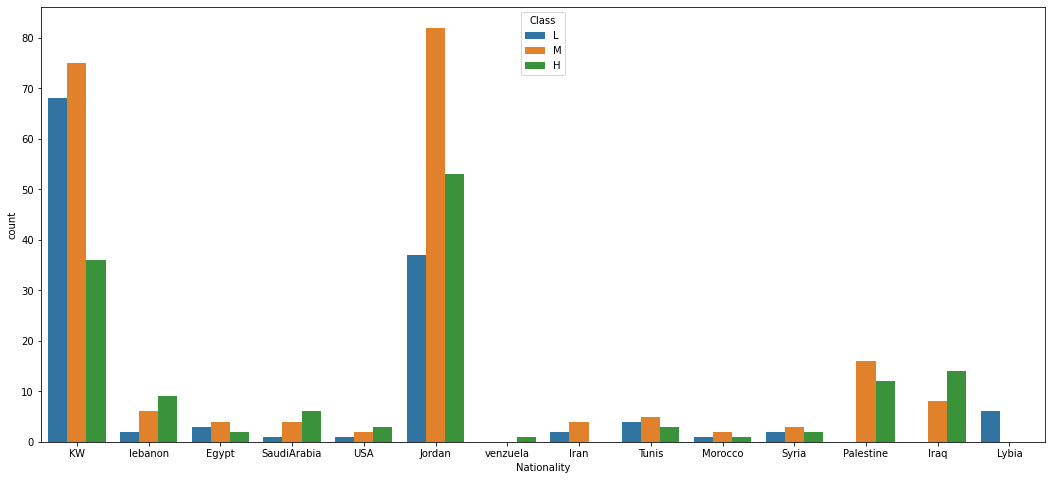

In [33]:
fig,ax = plt.subplots(figsize=(18, 8))
sns.countplot(x='Nationality', hue='Class', data=data,hue_order = ['L', 'M', 'H'], ax=ax)    
plt.show()

The plot highlights that most of the enrolled students in the e-learning environment are from Jordan and Kuwait. Regarding student performance, the highest scores obtained among Jordanian students are middle, followed by Kuwaiti students.

#### How is the students general performance?

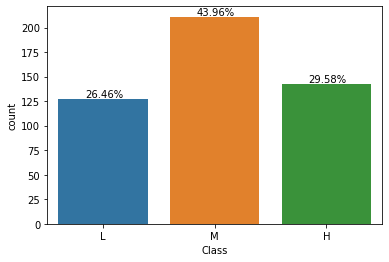

In [17]:
ax = sns.countplot(x='Class', data=data, order=['L', 'M', 'H'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

Based on this plot, it can be revealed that for all students enrolled in the platform, the highest obtained scores are Middle with an average of 43.96%, followed by high with 29.58%, and low with 26.46%. The percentage of students obtaining low grades can be considered high.

#### How is the student performance according to their educational level?

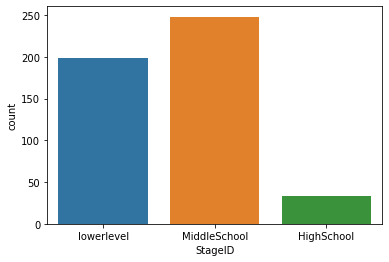

In [34]:
ax = sns.countplot(x='StageID', data=data)
plt.show()

Most of the enrolled students are from middle schools with an average of 250 students, followed by lower educational levels with an average of 200 students. However, the number of high school students is only 50. 

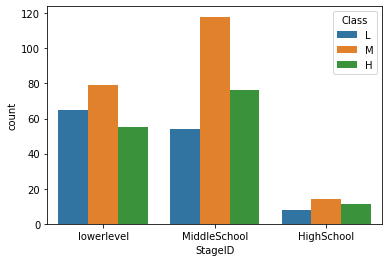

In [35]:
ax = sns.countplot(x='StageID', hue='Class', data=data, hue_order = ['L', 'M', 'H'])
plt.show()

Around 120 Students enrolled in Middle schools are obtaining middle grades. However, 60 are getting low grades. The plot also highlights that for the lower level, the average of students obtaining low grades is more important than those scoring high grades.

#### How is the student performance according to the sections?

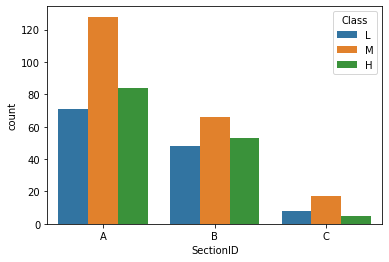

In [37]:
ax = sns.countplot(x='SectionID', hue='Class', data=data, order=['A', 'B', 'C'],hue_order = ['L', 'M', 'H'])
plt.show()

From this plot it can be revealed that the highest performance is scored mong students erolled in section A. However, the lowes grades are obtained among students belonging to section C

#### How is the student performance according to the learning topics?

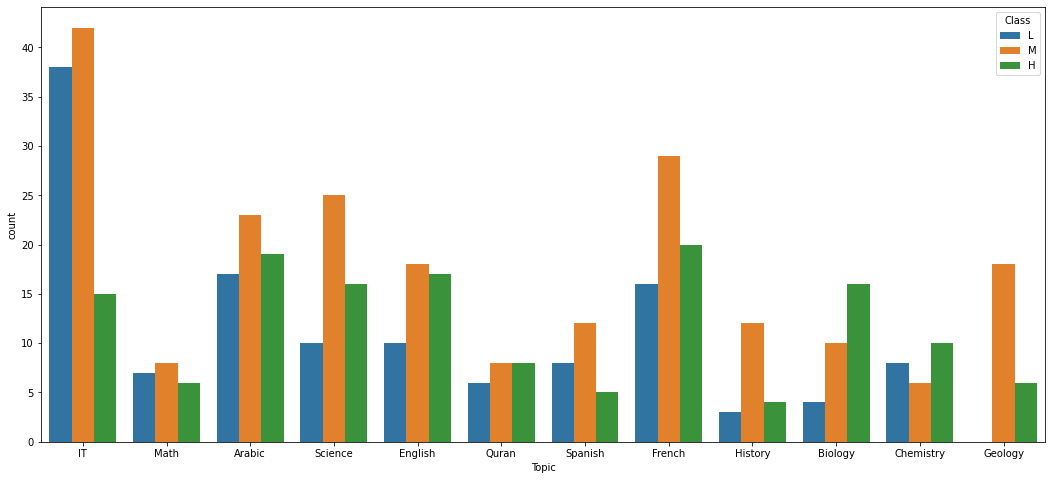

In [39]:
fig,ax = plt.subplots(figsize=(18, 8))
ax = sns.countplot(x='Topic', hue='Class', data=data,hue_order = ['L', 'M', 'H'])
plt.show()

The plot highlights that students performance is different according to the learning topic. It can be revealed that students are mostly obtaining midlle and low grades in the IT topic.However, in the Maths the results are slightly similar.

In [42]:
data.groupby('Topic').median()

,RaisedHands,VisitedResources,AnnouncementsView,Discussion
Topic,,,,
Arabic,32.0,65.0,41.0,38.0
Biology,78.5,88.5,54.0,47.0
Chemistry,79.0,84.5,47.0,30.5
English,55.0,50.0,33.0,36.0
French,35.0,80.0,23.0,21.0
Geology,80.0,82.0,68.5,60.5
History,69.0,84.0,72.0,65.0
IT,20.0,25.0,10.0,40.0
Math,28.0,15.0,19.0,40.0


The correlation between students' interaction in the e-learning environment and the learning topics highlight that the highest interaction behavior is scored in the Biology topic. However, in Math, students are rarely visiting the resources or considering the announcements. This may denote an impact on students' interaction behavior and their learning performance.

#### How is the student performance according to the semester ?

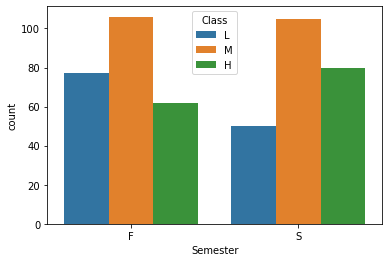

In [40]:
ax = sns.countplot(x='Semester', hue='Class', data=data,hue_order = ['L', 'M', 'H'])
plt.show()

From these results, it can be revealed that during the summer semester, the low grades increased compared to the fall semester. However, in terms of the middle grades, students performance remains similar. 

#### How is the student performance according to their absence ?

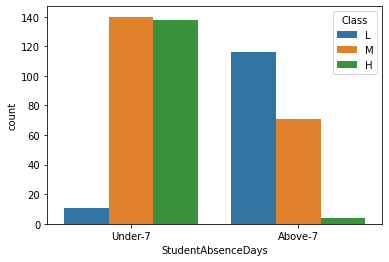

In [43]:
ax = sns.countplot(x='StudentAbsenceDays', hue='Class', data=data, order=['Under-7', 'Above-7'],hue_order = ['L', 'M', 'H'])
plt.show()

Based on this plot it can be pointed out that students being absent for more than 7 days are scoring low grades leading to their poor performance.

### Phase 4. Data Modeling

The exploration of data highlights that student performance is impacted by different factors including their inetarction behavior, learning engagement, and the enrolled topics. Thus, it is required to build a learning model to predict student performance and enhance it in the context of e-learning environment.

#### 1. Features Encoding

In [61]:
data.groupby("Class").count()
grade_class = {"L":0, "M":1, "H":2}
data["Class"] = data["Class"].map(grade_class)

In [100]:
#Source https://www.kaggle.com/roshansharma/student-performance-analysis#Label-Encoding
from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()

# label encoding for class
data['Class'] = le.fit_transform(data['Class'])

# label encoding for gender
data['Gender'] = le.fit_transform(data['Gender'])

# label encoding for nationality
data['Nationality'] = le.fit_transform(data['Nationality'])

#label encoding for stage
data['StageID'] = le.fit_transform(data['StageID'])

# label encoding for grade
data['GradeID'] = le.fit_transform(data['GradeID'])

# label encoding for section
data['SectionID'] = le.fit_transform(data['SectionID'])

# label encoding for topic
data['Topic'] = le.fit_transform(data['Topic'])

# label encoding for semester
data['Semester'] = le.fit_transform(data['Semester'])

# label encoding for parent relation
data['Relation'] = le.fit_transform(data['Relation'])

# label encoding for parent survey answering
data['ParentAnsweringSurvey'] = le.fit_transform(data['ParentAnsweringSurvey'])


# label encoding for parent satisfaction
data['ParentschoolSatisfaction'] = le.fit_transform(data['ParentschoolSatisfaction'])

# label encoding for Absence
data['StudentAbsenceDays'] = le.fit_transform(data['StudentAbsenceDays'])

In [101]:
data.head()

,Gender,Nationality,StageID,GradeID,SectionID,Topic,Semester,Relation,RaisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2


#### 2. Spliting Data into training and testing sets

In [80]:
X = data.drop(columns='Class')
y = data['Class']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [84]:
X_train.shape

(336, 15)

In [87]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.61


In [88]:
#Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.77
Accuracy of LDA classifier on test set: 0.76


In [89]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.75
Accuracy of GNB classifier on test set: 0.75


In [90]:
#Support Vector Machine
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.65
Accuracy of SVM classifier on test set: 0.63


In [91]:
#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.75
Accuracy of K-NN classifier on test set: 0.65


In [92]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
print('Accuracy of RandomForest classifier on training set: {:.2f}'
     .format(rfc.score(X_train, y_train)))
print('Accuracy of RandomForest classifier on test set: {:.2f}'
     .format(rfc.score(X_test, y_test)))

Accuracy of RandomForest classifier on training set: 1.00
Accuracy of RandomForest classifier on test set: 0.81


In [94]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
target_names = ['class 0(H)', 'class 1(L)', 'class 2(M)']
pred = rfc.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred, target_names = target_names))

[[21  0 10]
 [ 0 40  5]
 [ 5  7 56]]
              precision    recall  f1-score   support

  class 0(H)       0.81      0.68      0.74        31
  class 1(L)       0.85      0.89      0.87        45
  class 2(M)       0.79      0.82      0.81        68

    accuracy                           0.81       144
   macro avg       0.82      0.80      0.80       144
weighted avg       0.81      0.81      0.81       144



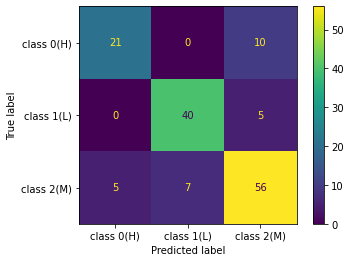

In [96]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfc, X_test, y_test, display_labels=target_names)  
plt.show()

The confusion matrix highlights that among 144  students, Random Forest correctly classified 56 in the Middle Class, 40 were classified in the low class, however 20 were predicted in the high class

### Results
The results pointed out that the use of features related to student profile, academic performance, and behavior with the virtual learning environment may lead to an accurate prediction of students performance while interacting with learning content. 
The classification results revealed that Random Forest outperformed other classifiers for both datasets
with an accuracy of 81%. With the set of selected features, the results highlighted that Random Forest classifier would rank a randomly selected student and predict their performance based on their academic and behavioral interaction with the learning platform.
Further improvements are required including:
1. The application of Gridsearch to find the optimal values for the classification model.
2. Including further classification techniques in the comparative phase
3. Explore features correlation to enhance the accuracy of the prediction model.
Building student model will further support implementing recommendation strategies to (a) support the cognitive development of students, (b) detect their interaction behavior, (c) determine their preferences, and (d) empower their learning performance. Thus, in future work, I will consider examine the task of recommending activities to have a better understanding of the impact of interaction behavior  on student performance in e-learning environment.

#### References
1. The dataset extracted from [Kaggle](https://www.kaggle.com/aljarah/xAPI-Edu-Data)
2. Thank you Udacity for supporting the knowledge building
3. Amrieh, E. A., Hamtini, T., & Aljarah, I. (2016). Mining Educational Data to Predict Student’s academic Performance using Ensemble Methods. International Journal of Database Theory and Application, 9(8), 119-136.